In [7]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# %%
# Configuration de l'affichage
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# %% [markdown]
# ## 1. Importation des données

# %%
def importer_donnees(chemin_fichier):
    """
    Importe les données d'un fichier texte contenant un nuage de points.
    
    Args:
        chemin_fichier (str): Chemin vers le fichier de données
    
    Returns:
        pandas.DataFrame: DataFrame contenant les données
    """
    try:
        # Lecture du fichier avec pandas
        donnees = pd.read_csv(chemin_fichier, delim_whitespace=True)
        print(" Données importées avec succès!")
        print(f" Forme des données: {donnees.shape}")
        return donnees
    except FileNotFoundError:
        print("✗ Erreur: Fichier non trouvé")
        return None
    except Exception as e:
        print(f"✗ Erreur lors de l'importation: {e}")
        return None

# %%
# Importation des données
# Utilisation de r pour raw string ou double backslash pour échapper les caractères
chemin_fichier = r"D:\cours_ENS\technique_et_outils_pour_preuve_de_comcept\Projet_nuage_de_points\Nuage_de_points\nuage_de_points.txt"
# Alternative: chemin_fichier = "D:\\cours_ENS\\technique_et_outils_pour_preuve_de_comcept\\Projet_nuage_de_points\\Nuage_de_points\\nuage_de_points.txt"
donnees = importer_donnees(chemin_fichier)

# %%
# Affichage des premières lignes
if donnees is not None:
    print("=== Aperçu des données ===")
    print(donnees.head())
    


 Données importées avec succès!
 Forme des données: (25, 3)
=== Aperçu des données ===
   X  Y             Z
0  1  1  -2,083333333
1  1  2         -3,45
2  1  3  -4,066666667
3  1  4  -4,083333333
4  1  5          -4,9


C:\Users\TABUEU\AppData\Local\Temp\ipykernel_24932\2820595383.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  donnees = pd.read_csv(chemin_fichier, delim_whitespace=True)


In [2]:
import pandas as pd
import numpy as np

# Supposons que vos données sont déjà importées dans un DataFrame
# Si ce n'est pas le cas, importez-les d'abord:
# df = pd.read_csv('votre_fichier.csv')  # pour un fichier CSV
# df = pd.read_excel('votre_fichier.xlsx')  # pour un fichier Excel
# df = pd.read_json('votre_fichier.json')  # pour un fichier JSON

# Afficher les premières lignes pour voir la structure des données
print("Aperçu des données:")
print(donnees.head())

# Extraction des colonnes X, Y et Z
# Si vos colonnes s'appellent exactement 'X', 'Y', 'Z':
X =  donnees['X'].values
Y =  donnees['Y'].values
Z =  donnees['Z'].values

# Si vous ne connaissez pas les noms exacts des colonnes:
print("\nNoms des colonnes disponibles:")
print(donnees.columns)


# Vous pouvez maintenant utiliser X, Y et Z pour d'autres analyses ou visualisations

Aperçu des données:
   X  Y             Z
0  1  1  -2,083333333
1  1  2         -3,45
2  1  3  -4,066666667
3  1  4  -4,083333333
4  1  5          -4,9

Noms des colonnes disponibles:
Index(['X', 'Y', 'Z'], dtype='object')


## Plan des moindres carrés

Pour déterminer le **plan des moindres carrés** (ou **plan de régression linéaire**) à partir d’un ensemble de points \((X_i, Y_i, Z_i)\),  
on cherche l’équation d’un plan de la forme :

\[
Z = aX + bY + c
\]

Donc l'objectif c'est de déterminer a, b et c grace a la librairie *LinearRegression*

Équation du plan: Z = -0.2903*X + -0.6497*Y + -1.5513


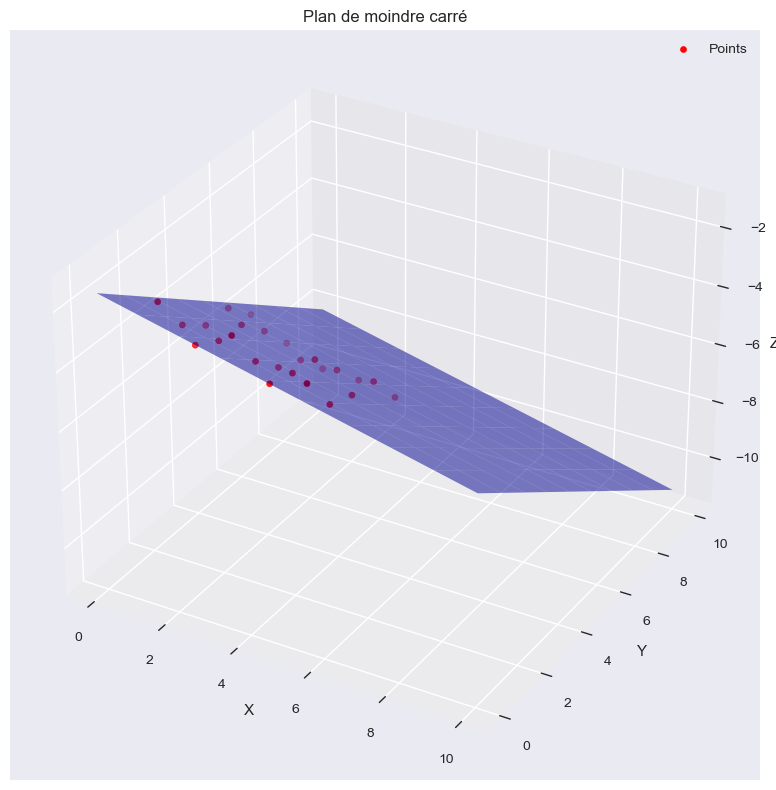

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

def convert_to_float(value):
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return value

# If X, Y, Z are lists or arrays with comma-formatted numbers:
# Convert them (assuming they exist in your environment)
X = np.array([convert_to_float(x) for x in X]) if 'X' in locals() else np.linspace(0, 10, 20)
Y = np.array([convert_to_float(y) for y in Y]) if 'Y' in locals() else np.linspace(0, 10, 20)
Z = np.array([convert_to_float(z) for z in Z]) if 'Z' in locals() else X + Y + np.random.normal(0, 1, size=len(X))


# Préparation des données pour la régression
X_train = np.column_stack((X, Y))

# Calcul du plan de moindre carré avec régression linéaire
reg = LinearRegression().fit(X_train, Z)
a = reg.coef_[0]  # Coefficient pour X
b = reg.coef_[1]  # Coefficient pour Y
c = reg.intercept_  # Constante

print(f"Équation du plan: Z = {a:.4f}*X + {b:.4f}*Y + {c:.4f}")

# Création d'une grille pour afficher le plan
x_surf, y_surf = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
z_surf = a * x_surf + b * y_surf + c

# Visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points
ax.scatter(X, Y, Z, color='red', label='Points')

# Affichage du plan
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, color='blue')

# Paramètres d'affichage
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plan de moindre carré')
ax.legend()

plt.tight_layout()
plt.show()